In [76]:
import time
import pandas as pd
import numpy as np
import datetime as datetime
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import skew
from scipy.stats import kurtosis
%matplotlib inline

# Input and Generating Required Dataframes

In [77]:
risk_free_rate = 0.02

# Reading input file
data = pd.read_csv('Exchange Rate_Final.csv')

# Creating seperate dataframes for each currency (Nominal and Real)
eur = data.loc[data['Currency Pair'] == 'USD/EUR']
eur.columns = ['Date', 'Currency Pair', 'Type', 'EUR', 'nan']
eur_nominal = eur[['Date', 'EUR']].loc[eur['Type'] == 'Nominal'].set_index('Date')
eur_real = eur[['Date', 'EUR']].loc[eur['Type'] == 'Real'].set_index('Date')

aud = data.loc[data['Currency Pair'] == 'USD/AUD']
aud.columns = ['Date', 'Currency Pair', 'Type', 'AUD', 'nan']
aud_nominal = aud[['Date', 'AUD']].loc[(aud['Type'] == 'Nominal') & (aud['Date'].isin(eur['Date']))].set_index('Date')
aud_real = aud[['Date', 'AUD']].loc[(aud['Type'] == 'Real') & (aud['Date'].isin(eur['Date']))].set_index('Date')

cad = data.loc[data['Currency Pair'] == 'USD/CAD']
cad.columns = ['Date', 'Currency Pair', 'Type', 'CAD', 'nan']
cad_nominal = cad[['Date', 'CAD']].loc[(cad['Type'] == 'Nominal') & (cad['Date'].isin(eur['Date']))].set_index('Date')
cad_real = cad[['Date', 'CAD']].loc[(cad['Type'] == 'Real') & (cad['Date'].isin(eur['Date']))].set_index('Date')

chf = data.loc[data['Currency Pair'] == 'USD/CHF']
chf.columns = ['Date', 'Currency Pair', 'Type', 'CHF', 'nan']
chf_nominal = chf[['Date', 'CHF']].loc[(chf['Type'] == 'Nominal') & (chf['Date'].isin(eur['Date']))].set_index('Date')
chf_real = chf[['Date', 'CHF']].loc[(chf['Type'] == 'Real') & (chf['Date'].isin(eur['Date']))].set_index('Date')

gbp = data.loc[data['Currency Pair'] == 'USD/GBP']
gbp.columns = ['Date', 'Currency Pair', 'Type', 'GBP', 'nan']
gbp_nominal = gbp[['Date', 'GBP']].loc[(gbp['Type'] == 'Nominal') & (gbp['Date'].isin(eur['Date']))].set_index('Date')
gbp_real = gbp[['Date', 'GBP']].loc[(gbp['Type'] == 'Real') & (gbp['Date'].isin(eur['Date']))].set_index('Date')

nok = data.loc[data['Currency Pair'] == 'USD/NOK']
nok.columns = ['Date', 'Currency Pair', 'Type', 'NOK', 'nan']
nok_nominal = nok[['Date', 'NOK']].loc[(nok['Type'] == 'Nominal') & (nok['Date'].isin(eur['Date']))].set_index('Date')
nok_real = nok[['Date', 'NOK']].loc[(nok['Type'] == 'Real') & (nok['Date'].isin(eur['Date']))].set_index('Date')

nzd = data.loc[data['Currency Pair'] == 'USD/NZD']
nzd.columns = ['Date', 'Currency Pair', 'Type', 'NZD', 'nan']
nzd_nominal = nzd[['Date', 'NZD']].loc[(nzd['Type'] == 'Nominal') & (nzd['Date'].isin(eur['Date']))].set_index('Date')
nzd_real = nzd[['Date', 'NZD']].loc[(nzd['Type'] == 'Real') & (nzd['Date'].isin(eur['Date']))].set_index('Date')

sek = data.loc[data['Currency Pair'] == 'USD/SEK']
sek.columns = ['Date', 'Currency Pair', 'Type', 'SEK', 'nan']
sek_nominal = sek[['Date', 'SEK']].loc[(sek['Type'] == 'Nominal') & (sek['Date'].isin(eur['Date']))].set_index('Date')
sek_real = sek[['Date', 'SEK']].loc[(sek['Type'] == 'Real') & (sek['Date'].isin(eur['Date']))].set_index('Date')

yen = data.loc[data['Currency Pair'] == 'USD/YEN']
yen.columns = ['Date', 'Currency Pair', 'Type', 'YEN', 'nan']
yen_nominal = yen[['Date', 'YEN']].loc[(yen['Type'] == 'Nominal') & (yen['Date'].isin(eur['Date']))].set_index('Date')
yen_real = yen[['Date', 'YEN']].loc[(yen['Type'] == 'Real') & (yen['Date'].isin(eur['Date']))].set_index('Date')

# Signal Generation and Portfolio Construction

In [78]:
# Creating two dataframes
nominal = pd.concat([aud_nominal['AUD'], cad_nominal['CAD'], chf_nominal['CHF'], eur_nominal['EUR'], gbp_nominal['GBP'], nok_nominal['NOK'], nzd_nominal['NZD'], sek_nominal['SEK'], yen_nominal['YEN']], axis = 1)
real = pd.concat([aud_real['AUD'], cad_real['CAD'], chf_real['CHF'], eur_real['EUR'], gbp_real['GBP'], nok_real['NOK'], nzd_real['NZD'], sek_real['SEK'], yen_real['YEN']], axis = 1)

# Generating returns
returns = nominal/nominal.shift(-1) - 1

# Signal Generation
signal_temp = nominal/real - 1

# Portfolio Construction
signal = pd.DataFrame(np.zeros(shape = signal_temp.shape), columns = signal_temp.columns, index = signal_temp.index)
top_n = 2
for index, row in signal_temp.iterrows():
        signal.loc[index, row.nlargest(top_n).index] = 1      
for index, row in signal_temp.iterrows():
        signal.loc[index, row.nsmallest(top_n).index] = -1
        
asset_returns = signal * returns
portfolio_returns = (asset_returns.sum(axis = 1))/4
cum_returns = np.cumprod((1 + portfolio_returns))
cum_returns = cum_returns.shift(1)
cum_returns[0] = 1

# Performance Analysis

------------------------PnL Graph---------------------------


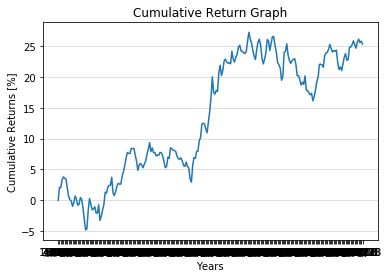



Cumulative Return =  25.32%


-----------------Daily Returns Statistics--------------------




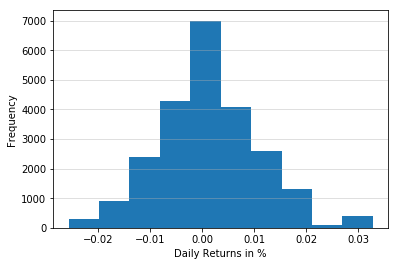

Average Daily Returns =  0.10%
Standard Deviation of Daily Returns =  0.009732796264818684
Skewness of Daily Returns =  [0.29382752]
Kurtosis of Daily Returns =  [0.64655616]


-------------------Annualized Performance---------------------


Annualized Return =  1.16%
Sharpe Ratio =  0.09841225615145278


In [110]:
#Cummulative Return
cum_return = cum_returns[cum_returns.index[-1]]
dates = cum_returns.index
print ("------------------------PnL Graph---------------------------")
plt.plot(dates,(cum_returns-1)*100)
plt.xlabel("Years")
plt.ylabel("Cumulative Returns [%]")
plt.title("Cumulative Return Graph")
plt.grid(axis='y', alpha=0.5)
plt.show()
print('\n')
print("Cumulative Return = ","{:.2%}".format(cum_return-1))

#print mean,std,shape
print ('\n')
print('-----------------Daily Returns Statistics--------------------')
print ('\n')
returns = portfolio_returns.to_frame()
#returns1 = portfolio_returns
my_list = returns1[0].tolist()
x = my_list*100
mean = np.mean(x)
##print(x)
plt.hist(x)
plt.xlabel("Daily Returns in %")
plt.ylabel("Frequency")
#plt.axis([-10, 12, 0, 40])
plt.grid(axis='y', alpha=0.5)
plt.show()
print('Average Daily Returns = ',"{:.2%}".format(mean))
std = returns.std()
print('Standard Deviation of Daily Returns = ', std[0])
skewness = skew(returns)
print('Skewness of Daily Returns = ', skewness)
kurt = kurtosis(returns)
print('Kurtosis of Daily Returns = ', kurt)

print ('\n')
print ('-------------------Annualized Performance---------------------')
print ('\n')

#Annualized Return
ann_returns = (cum_returns[-1] ** (12.00/len(cum_returns)) - 1)
print("Annualized Return = ","{:.2%}".format(ann_returns))

#Sharpe Ratio
drfr = ((1+risk_free_rate)**(1/365))-1
sharpe_ratio = (mean-drfr)/(std)
print("Sharpe Ratio = ",sharpe_ratio[0])
